In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sympy as sp

In [108]:
df = pd.read_csv('DataBase.csv')
df

,duration,distance,place,type
0,14:39:12,1036.23,SÃO PAULO,VUC
1,13:40:21,887.25,SÃO PAULO,TOCO
2,13:11:51,854.96,SÃO PAULO,TOCO
3,14:06:40,842.50,SÃO PAULO,TOCO
4,13:53:13,839.72,SÃO PAULO,TOCO
...,...,...,...,...
1824,00:00:05,0.00,DUQUE DE CAXIAS,VUC
1825,00:00:05,0.00,DUQUE DE CAXIAS,VUC
1826,00:00:08,0.00,DUQUE DE CAXIAS,VUC
1827,00:00:05,0.00,DUQUE DE CAXIAS,VUC


# TRATAMENTO DOS DADOS
- Passando as colunas numéricas para os deus devidos tipos, as vezes o pandas interpreta o número como um objeto ou string

In [109]:
df['distance'] = pd.to_numeric(df.distance, errors='coerce')
df.head()

,duration,distance,place,type
0,14:39:12,1036.23,SÃO PAULO,VUC
1,13:40:21,887.25,SÃO PAULO,TOCO
2,13:11:51,854.96,SÃO PAULO,TOCO
3,14:06:40,842.50,SÃO PAULO,TOCO
4,13:53:13,839.72,SÃO PAULO,TOCO


- Passando a coluna de duração para objeto timedelta do pandas, para realmente podermos trabalhar com os dados no formato de horas

In [110]:
df['duration'] = pd.to_timedelta(df['duration'], errors='coerce')
df.head()

,duration,distance,place,type
0,0 days 14:39:12,1036.23,SÃO PAULO,VUC
1,0 days 13:40:21,887.25,SÃO PAULO,TOCO
2,0 days 13:11:51,854.96,SÃO PAULO,TOCO
3,0 days 14:06:40,842.50,SÃO PAULO,TOCO
4,0 days 13:53:13,839.72,SÃO PAULO,TOCO


- Passando essa mesma coluna de duração para segundos, pois será melhor analisar assim, tendo a duração total em somenta 1 unidade

In [111]:
df['duration'] = df.duration.dt.total_seconds()
df.head()

,duration,distance,place,type
0,52752.0,1036.23,SÃO PAULO,VUC
1,49221.0,887.25,SÃO PAULO,TOCO
2,47511.0,854.96,SÃO PAULO,TOCO
3,50800.0,842.50,SÃO PAULO,TOCO
4,49993.0,839.72,SÃO PAULO,TOCO


# ANÁLISE DE DADOS

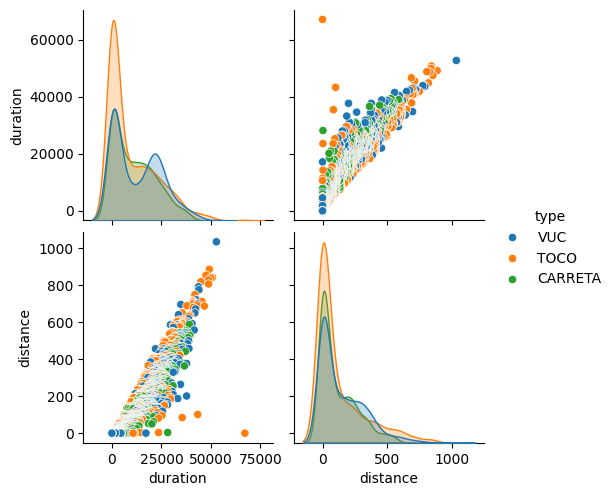

In [112]:
sns.pairplot(df, hue='type')

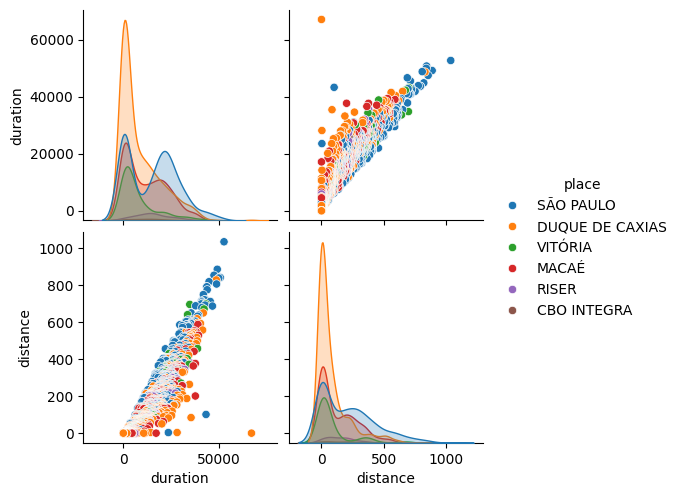

In [113]:
sns.pairplot(df, hue='place')

# TRANSFORMAÇÃO DOS DADOS

In [114]:
df = pd.get_dummies(df, columns=['place', 'type'])
df.head()

,duration,distance,place_CBO INTEGRA,place_DUQUE DE CAXIAS,place_MACAÉ,place_RISER,place_SÃO PAULO,place_VITÓRIA,type_CARRETA,type_TOCO,type_VUC
0,52752.0,1036.23,False,False,False,False,True,False,False,False,True
1,49221.0,887.25,False,False,False,False,True,False,False,True,False
2,47511.0,854.96,False,False,False,False,True,False,False,True,False
3,50800.0,842.50,False,False,False,False,True,False,False,True,False
4,49993.0,839.72,False,False,False,False,True,False,False,True,False


- Removendo linhas com valores nulos

In [115]:
rows_afected = (df.isna().any(axis=1)).sum()
print(f'{rows_afected} linhas removidas')

df.dropna(inplace=True)

5 linhas removidas


# PREVISÃO DOS DADOS

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [117]:
xData = df.drop(columns=['distance'])
yData = df.distance

xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
model = RandomForestRegressor()
model = model.fit(xTreino, yTreino)


In [118]:
score = model.score(xTeste, yTeste)
score

0.9058484942757974

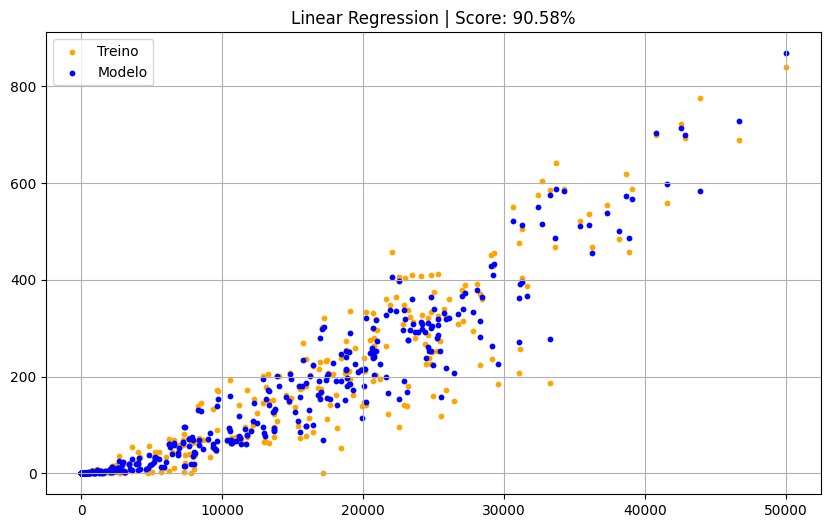

In [119]:
xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.25)
yModel = model.predict(xTeste)

plt.figure(figsize=(10, 6))

plt.scatter(xTeste.duration, yTeste, color='orange', s=10, label='Treino')
plt.scatter(xTeste.duration, yModel, color='blue', s=10, label='Modelo',)

plt.title('Linear Regression | Score: ' + str(round(score*100, 2)) + '%')
plt.legend()
plt.grid()

# SALVANDO O MODELO

In [120]:
import joblib

joblib.dump(model, 'model.pkl')   # SALVANDO
model = joblib.load('model.pkl')  # CARREGANDO ELE NOVAMENTE

- Verificando se o modelo pode ser usado normalmente

In [121]:
yModel = model.predict(xTeste)
score  = metrics.r2_score(yTeste, yModel)
score

0.9717122901052992